In [11]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [12]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_37299b6609394f95bab300c6a3f76f6f = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NZUei2VBqA3HjtHfO57578ooy8mqij9fSPiXl0o8KwU7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_37299b6609394f95bab300c6a3f76f6f.get_object(Bucket='battleofneighbourhoods-donotdelete-pr-6fe0zh5vflk5io',Key='NewYork.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_newyork = pd.read_csv(body)
df_newyork.head()


,PostalCode,Neighborhood,Latitude,Longitude
0,10453,Central Bronx,40.85361,-73.91358
1,10458,Bronx Park and Fordham,40.86494,-73.88488
2,10451,High Bridge and Morrisania,40.81895,-73.92041
3,10454,Hunts Point and Mott Haven,40.80546,-73.91695
4,10463,Kingsbridge and Riverdale,40.87933,-73.91033


In [14]:
import warnings
warnings.filterwarnings('ignore')
address = 'New York'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_y = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of New York are 40.7127281, -74.0060152.


In [18]:
map_newyork = folium.Map(location=[latitude_x, longitude_y], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df_newyork['Latitude'], df_newyork['Longitude'], df_newyork['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [27]:
CLIENT_ID = 'EUEBNIAVNOEWSUZOW4RDONSSTIUCQFF4EGVRDY0C5WWMTDYB' # your Foursquare ID
CLIENT_SECRET = 'LU4UJHNVEPON51AANA0DBJ35AVW5EUFFDLIVIDX3BDG2XJGH' # your Foursquare Secret
VERSION = '20200602'
address = 'New York'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude_n1 = location.latitude
longitude_n1 = location.longitude
print('The geograpical coordinate of neighborhood_1 are {}, {}.'.format(latitude_x, longitude_y))

The geograpical coordinate of neighborhood_1 are 40.7127281, -74.0060152.


In [28]:

radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [29]:
results = requests.get(url).json()

In [30]:
results

{'meta': {'code': 200, 'requestId': '5ed695de0f59680025f03305'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 183,
  'suggestedBounds': {'ne': {'lat': 40.71902810630001,
    'lng': -73.99771924888786},
   'sw': {'lat': 40.70642809369999, 'lng': -74.01431115111212}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,


In [31]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.id', 'venue.location.address',
       'venue.location.cc', 'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [32]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [33]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,The Bar Room at Temple Court,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",40.711448,-74.006802
1,"The Beekman, A Thompson Hotel","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,"[{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...",40.711434,-74.006272
3,City Hall Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",40.712415,-74.006724
4,The Wooly Daily,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",40.712137,-74.008395


In [34]:
nearby_venues.head(9)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,The Bar Room at Temple Court,"[{'id': '4bf58dd8d48988d1d5941735', 'name': 'H...",40.711448,-74.006802
1,"The Beekman, A Thompson Hotel","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,"[{'id': '4bf58dd8d48988d1fc941735', 'name': 'L...",40.711434,-74.006272
3,City Hall Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",40.712415,-74.006724
4,The Wooly Daily,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",40.712137,-74.008395
5,The Class by Taryn Toomey,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",40.712753,-74.008734
6,Takahachi Bakery,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",40.713653,-74.008804
7,Gibney Dance Center Downtown,"[{'id': '4bf58dd8d48988d134941735', 'name': 'D...",40.713923,-74.005661
8,Four Seasons Hotel New York Downtown,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",40.712612,-74.009380


In [35]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
3,City Hall Park,Park,40.712415,-74.006724
4,The Wooly Daily,Coffee Shop,40.712137,-74.008395


In [36]:
nearby_venues.head(10)


,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
3,City Hall Park,Park,40.712415,-74.006724
4,The Wooly Daily,Coffee Shop,40.712137,-74.008395
5,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734
6,Takahachi Bakery,Bakery,40.713653,-74.008804
7,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661
8,Four Seasons Hotel New York Downtown,Hotel,40.712612,-74.009380
9,Pisillo Italian Panini,Sandwich Place,40.710530,-74.007526


In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
newyork_venues = getNearbyVenues(names=df_newyork['Neighborhood'],
                                   latitudes=df_newyork['Latitude'],
                                   longitudes=df_newyork['Longitude']
                                  )
newyork_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Borough Park,39,39,39,39,39,39
Bronx Park and Fordham,60,60,60,60,60,60
Canarsie and Flatlands,24,24,24,24,24,24
Central Bronx,43,43,43,43,43,43
Central Brooklyn,52,52,52,52,52,52


In [39]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 216 uniques categories.


In [40]:
# One hot encoding

newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]
newyork_onehot.head()

,Neighborhood,African Restaurant,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Store,New American Restaurant,Nightlife Spot,Noodle House,Optical Shop,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Central Bronx,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Central Bronx,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [42]:
newyork_onehot.shape

(1023, 217)

In [43]:
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()
newyork_grouped.head()

,Neighborhood,African Restaurant,Airport Terminal,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Comic Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,Health Food Store,History Museum,Hookah Bar,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundry Service,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Moving Target,Music Store,New American Restaurant,Nightlife Spot,Noodle House,Optical Shop,Outlet Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Rental Car Location,Rental Service,Restaurant,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,State / Provincial Park,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tech Startup,Tennis Stadium,Thai Restaurant,Theater,Thrift / Vintage Store,Trail,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Borough Park,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.025641,0.0,0.0,0.000000,0.025641,0.025641,0.076923,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.025641,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.025641,0.000000,0.0,0.0,0.0,0.025641,0.0,0.0,0.000000,0.0,0.0,0.153846,0.0,0.000000,0.0,0.0,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.025641,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.025641,0.000000,0.0,0.0,0.0,0.025641,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.025641,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.025641,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.025641,0.0,0.0,0.0,0.000000,0.0,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [44]:
newyork_grouped.shape

(17, 217)

In [45]:
num_top_venues = 5
for hood in newyork_grouped['Neighborhood'][:3]:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Borough Park----
                venue  freq
0  Chinese Restaurant  0.15
1                Bank  0.08
2            Pharmacy  0.08
3   Convenience Store  0.08
4         Pizza Place  0.05


----Bronx Park and Fordham----
            venue  freq
0     Pizza Place  0.08
1   Deli / Bodega  0.07
2          Garden  0.07
3  Sandwich Place  0.05
4            Café  0.05


----Canarsie and Flatlands----
            venue  freq
0     Pizza Place  0.12
1  Hardware Store  0.08
2      Bagel Shop  0.08
3            Pool  0.04
4          Bakery  0.04




In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']

for ind in np.arange(newyork_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Borough Park,Chinese Restaurant,Convenience Store,Pharmacy,Bank,Pizza Place,Café,Sushi Restaurant,Steakhouse,Bus Line,Donut Shop
1,Bronx Park and Fordham,Pizza Place,Deli / Bodega,Garden,Sandwich Place,Café,Botanical Garden,Pharmacy,Mexican Restaurant,Plaza,Spanish Restaurant
2,Canarsie and Flatlands,Pizza Place,Hardware Store,Bagel Shop,Pharmacy,Bus Station,Sandwich Place,Chinese Restaurant,Pool,Perfume Shop,Bowling Alley
3,Central Bronx,Pizza Place,Bus Station,Spanish Restaurant,Bank,Supermarket,Fried Chicken Joint,Pharmacy,Grocery Store,Latin American Restaurant,Donut Shop
4,Central Brooklyn,Pizza Place,Gym / Fitness Center,Discount Store,Sandwich Place,Restaurant,Fried Chicken Joint,Women's Store,Hotel,Playground,Performing Arts Venue


In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


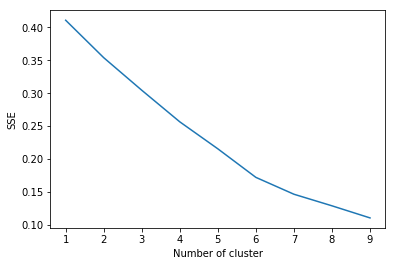

In [49]:
newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(newyork_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
import numpy as np

For 2  Clusters  the average silhouette_score is : 0.12462673423544486
For 3  Clusters  the average silhouette_score is : 0.08391530091738908
For 4  Clusters  the average silhouette_score is : 0.09551836393716767
For 5  Clusters  the average silhouette_score is : 0.04693097204863449


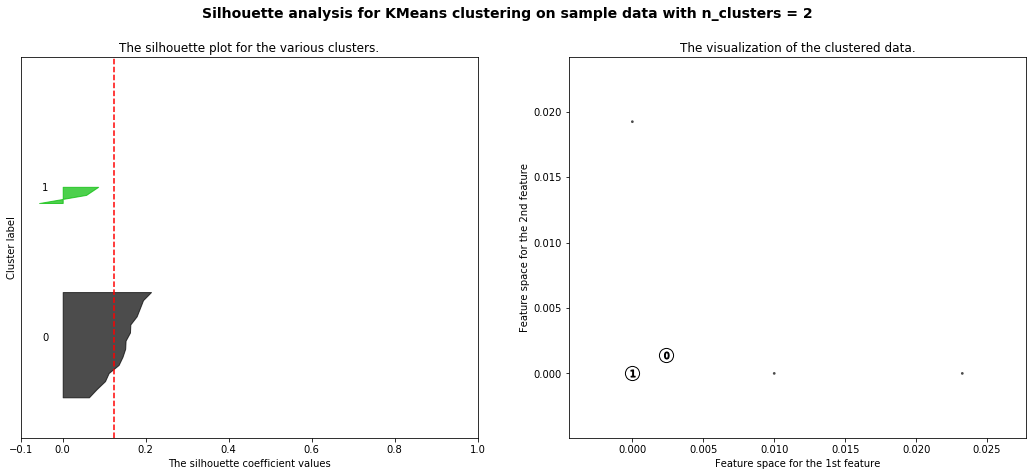

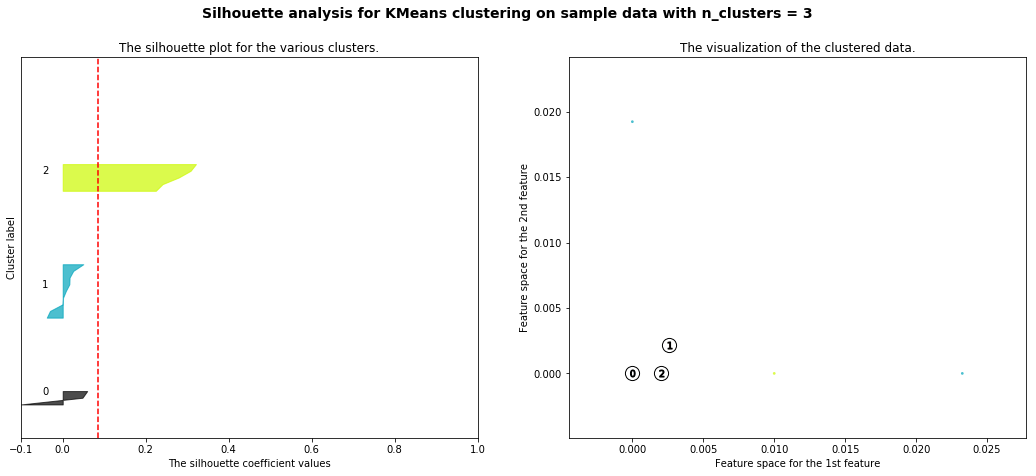

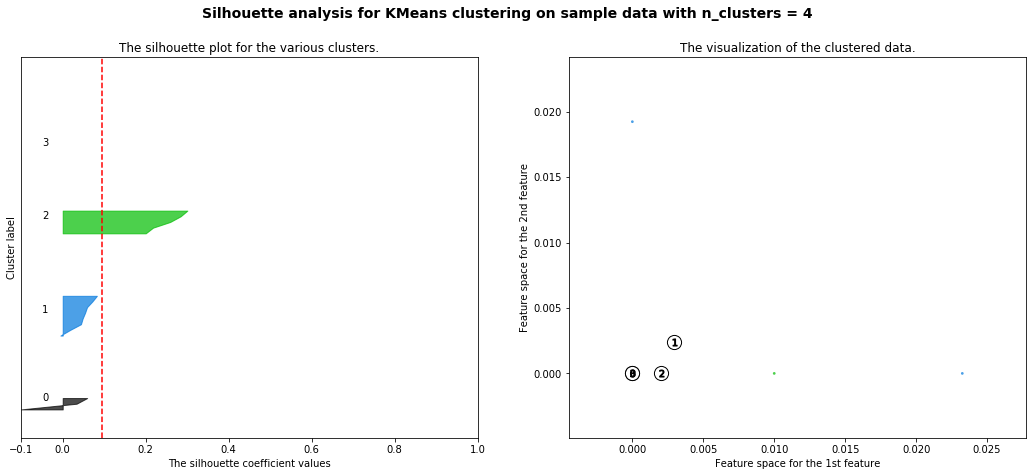

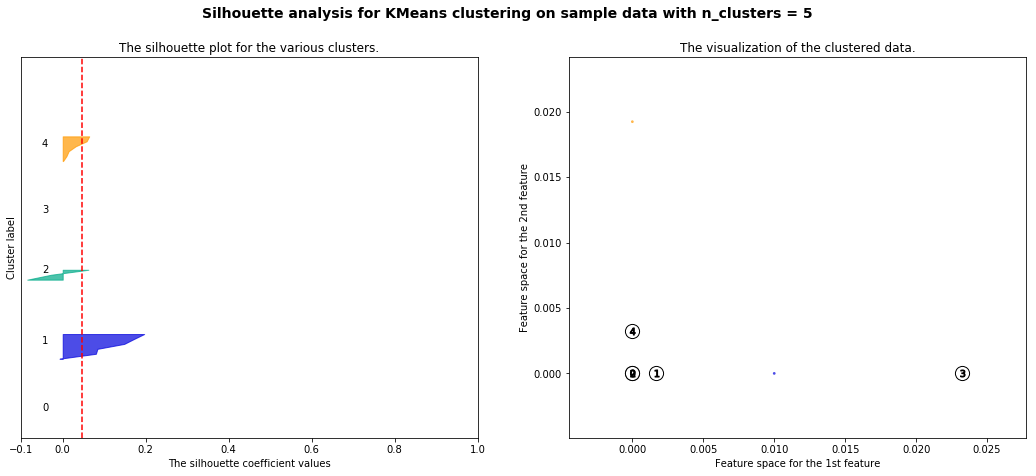

In [51]:
range_n_clusters=[2,3,4,5]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(newyork_grouped_clustering) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(newyork_grouped_clustering)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(newyork_grouped_clustering, cluster_labels)
    print("For", n_clusters, " Clusters  "
          "the average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(newyork_grouped_clustering, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color1 = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color1, edgecolor=color1, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors2 = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(newyork_grouped_clustering.iloc[:, 0], newyork_grouped_clustering.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors2, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


In [52]:
kclusters = 3

newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 0], dtype=int32)

In [53]:
newyork_merged = df_newyork

# add clustering labels
newyork_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
newyork_merged = newyork_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newyork_merged.head()# check the last columns!

,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10453,Central Bronx,40.85361,-73.91358,1,Pizza Place,Bus Station,Spanish Restaurant,Bank,Supermarket,Fried Chicken Joint,Pharmacy,Grocery Store,Latin American Restaurant,Donut Shop
1,10458,Bronx Park and Fordham,40.86494,-73.88488,1,Pizza Place,Deli / Bodega,Garden,Sandwich Place,Café,Botanical Garden,Pharmacy,Mexican Restaurant,Plaza,Spanish Restaurant
2,10451,High Bridge and Morrisania,40.81895,-73.92041,0,Mexican Restaurant,Mobile Phone Shop,Sandwich Place,Pizza Place,Ice Cream Shop,Theater,Coffee Shop,Diner,Donut Shop,Kids Store
3,10454,Hunts Point and Mott Haven,40.80546,-73.91695,1,Donut Shop,Gym,Pizza Place,Coffee Shop,Peruvian Restaurant,Storage Facility,Deli / Bodega,Latin American Restaurant,Diner,Supermarket
4,10463,Kingsbridge and Riverdale,40.87933,-73.91033,1,Sandwich Place,Pizza Place,Donut Shop,Pharmacy,Mexican Restaurant,Supermarket,Café,Bank,Spanish Restaurant,Coffee Shop


In [54]:
map_clusters = folium.Map(location=[latitude_x, longitude_y], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']
